# E-Commerce Order Prediction


# Importing Libraries
For analysing the data we will be using Pandas and Numpy and for visualization Matplotlib and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now that we have imported the necessary libraries, now we will read the data.
df = pd.read_excel(r'C:\Users\Shraddha\OneDrive\Desktop\Capstone\Project2\Data.xlsx', sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# We will keep an untouched copy of our dataset in case we need it ahead.
dt = df.copy()

# Data Exploration

In [4]:
# let’s explore the dataset statistics.
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

We can observe there are 5630 observations in total and some of the features have missing values. Let’s see which of these variables have missing values. More on these values later. Before that, we will remove the customerID column as it is irrelevant to our needs.

In [7]:
df.shape

(5630, 20)

In [8]:
df.drop('CustomerID', axis=1, inplace=True)

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_2412\3269385193.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


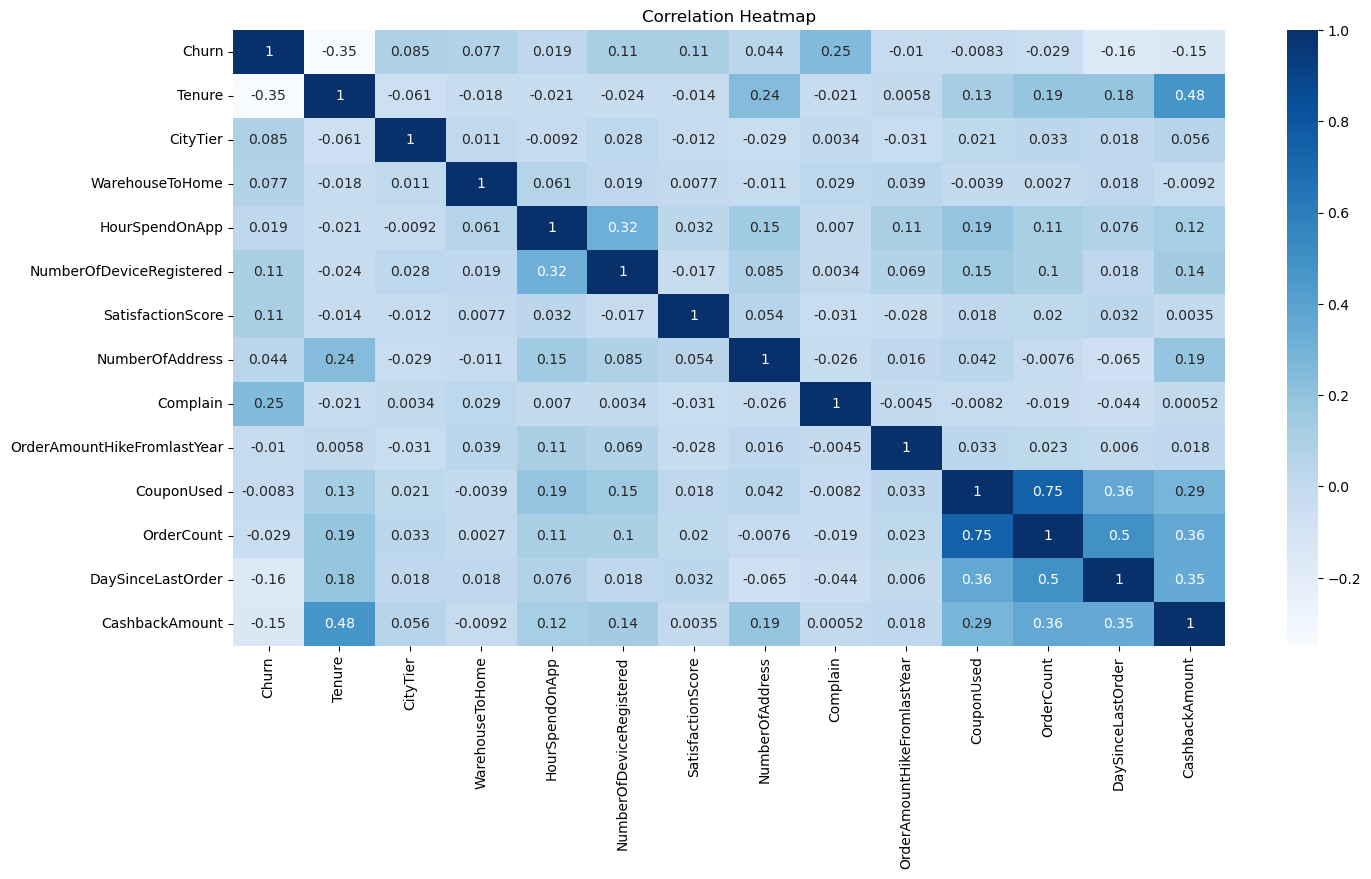

In [10]:
plt.figure(figsize=(16, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# Handling Outliers
Let’s now explore if there are any outliers in our feature columns.

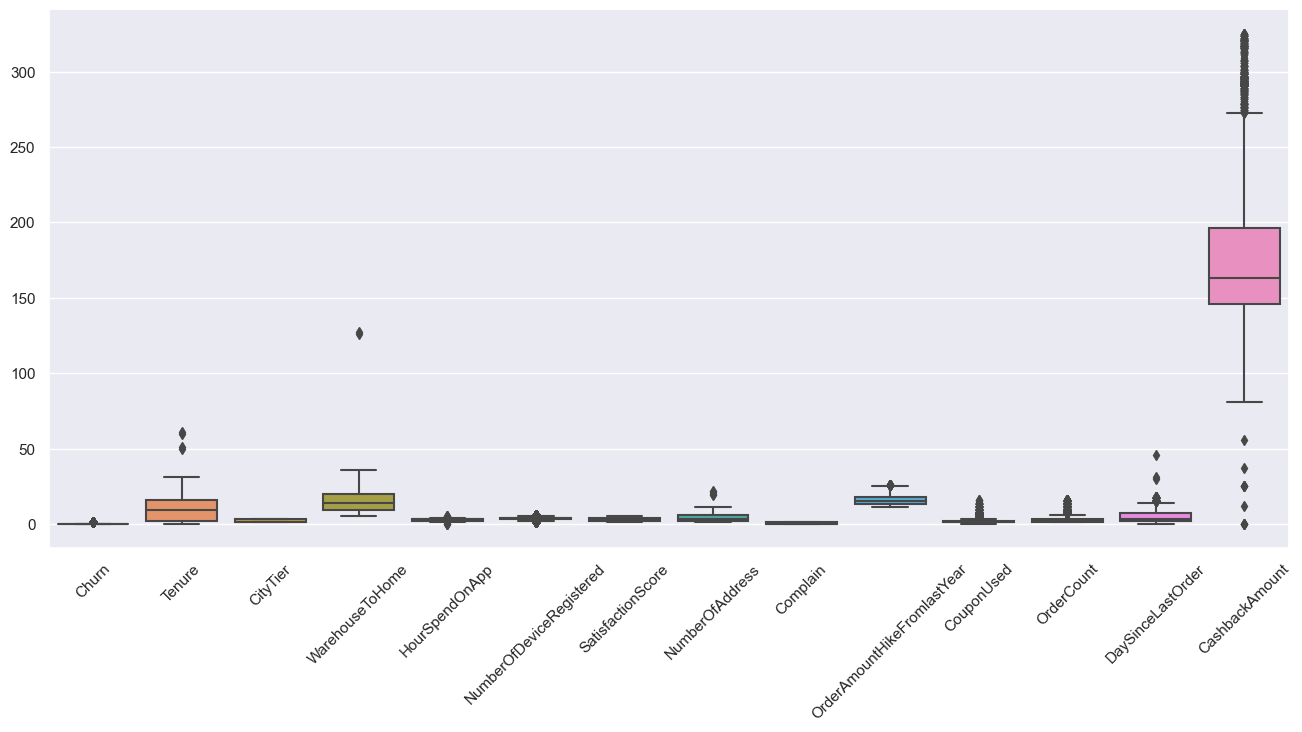

In [7]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

There’s a quite a lot of features with outliers. We will use a quantile based flooring method to treat outliers. As per the method, any value beyond 1.5*Q1 and 1.5*Q3 will be regarded as outliers, and all the outlier values will be replaced by Q1-1.5*Q1 and Q3+1.5*Q3.

In [8]:
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn')
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

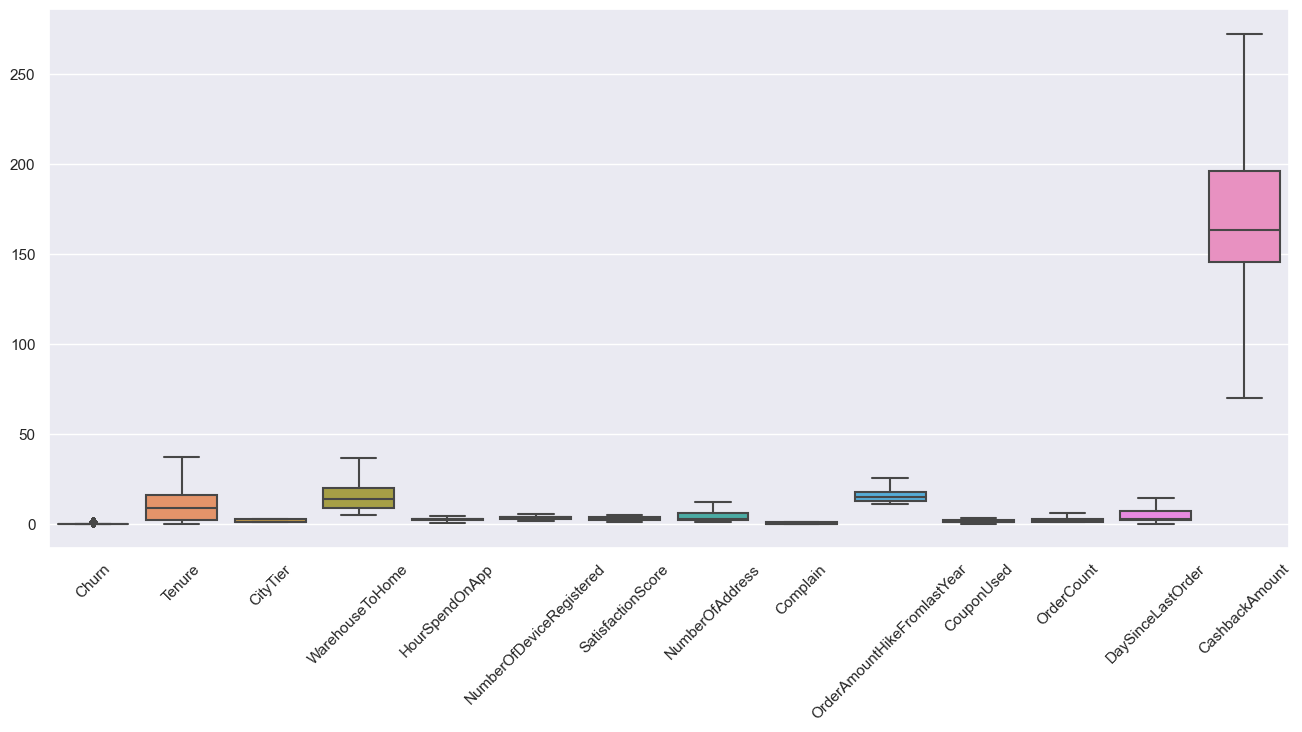

In [9]:
# Let’s see if we got rid of outliers or not.
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

Nice. Now our data is free from outliers.

In [10]:
#Handling Missing Values
#From the dataset info, we observed some features have missing values. 
#This section will be imputing the missing values with appropriate values.

df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
# We will impute these features with means and medians wherever appropriate.
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [12]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [12]:
#checking for imbalance data
count=pd.value_counts(df['Churn'],sort=True)
count

0    4682
1     948
Name: Churn, dtype: int64

<Axes: >

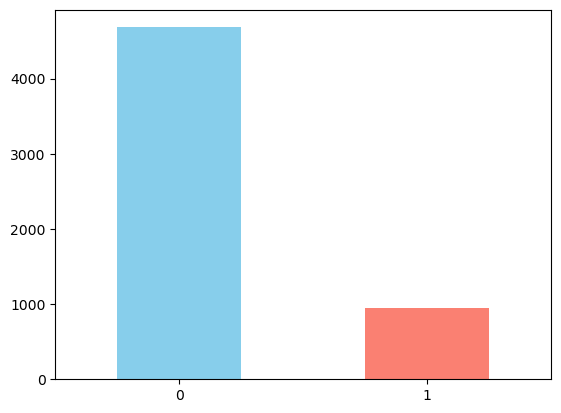

In [17]:
count.plot(kind='bar',rot=0,color=['skyblue', 'salmon'])

# Univariate Analysis

In [13]:
# Categorical variables
# First, we will look into the categorical variables and the frequency of each value.

for col in cat:
    print(df[col].value_counts())

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Male      3384
Female    2246
Name: Gender, dtype: int64
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


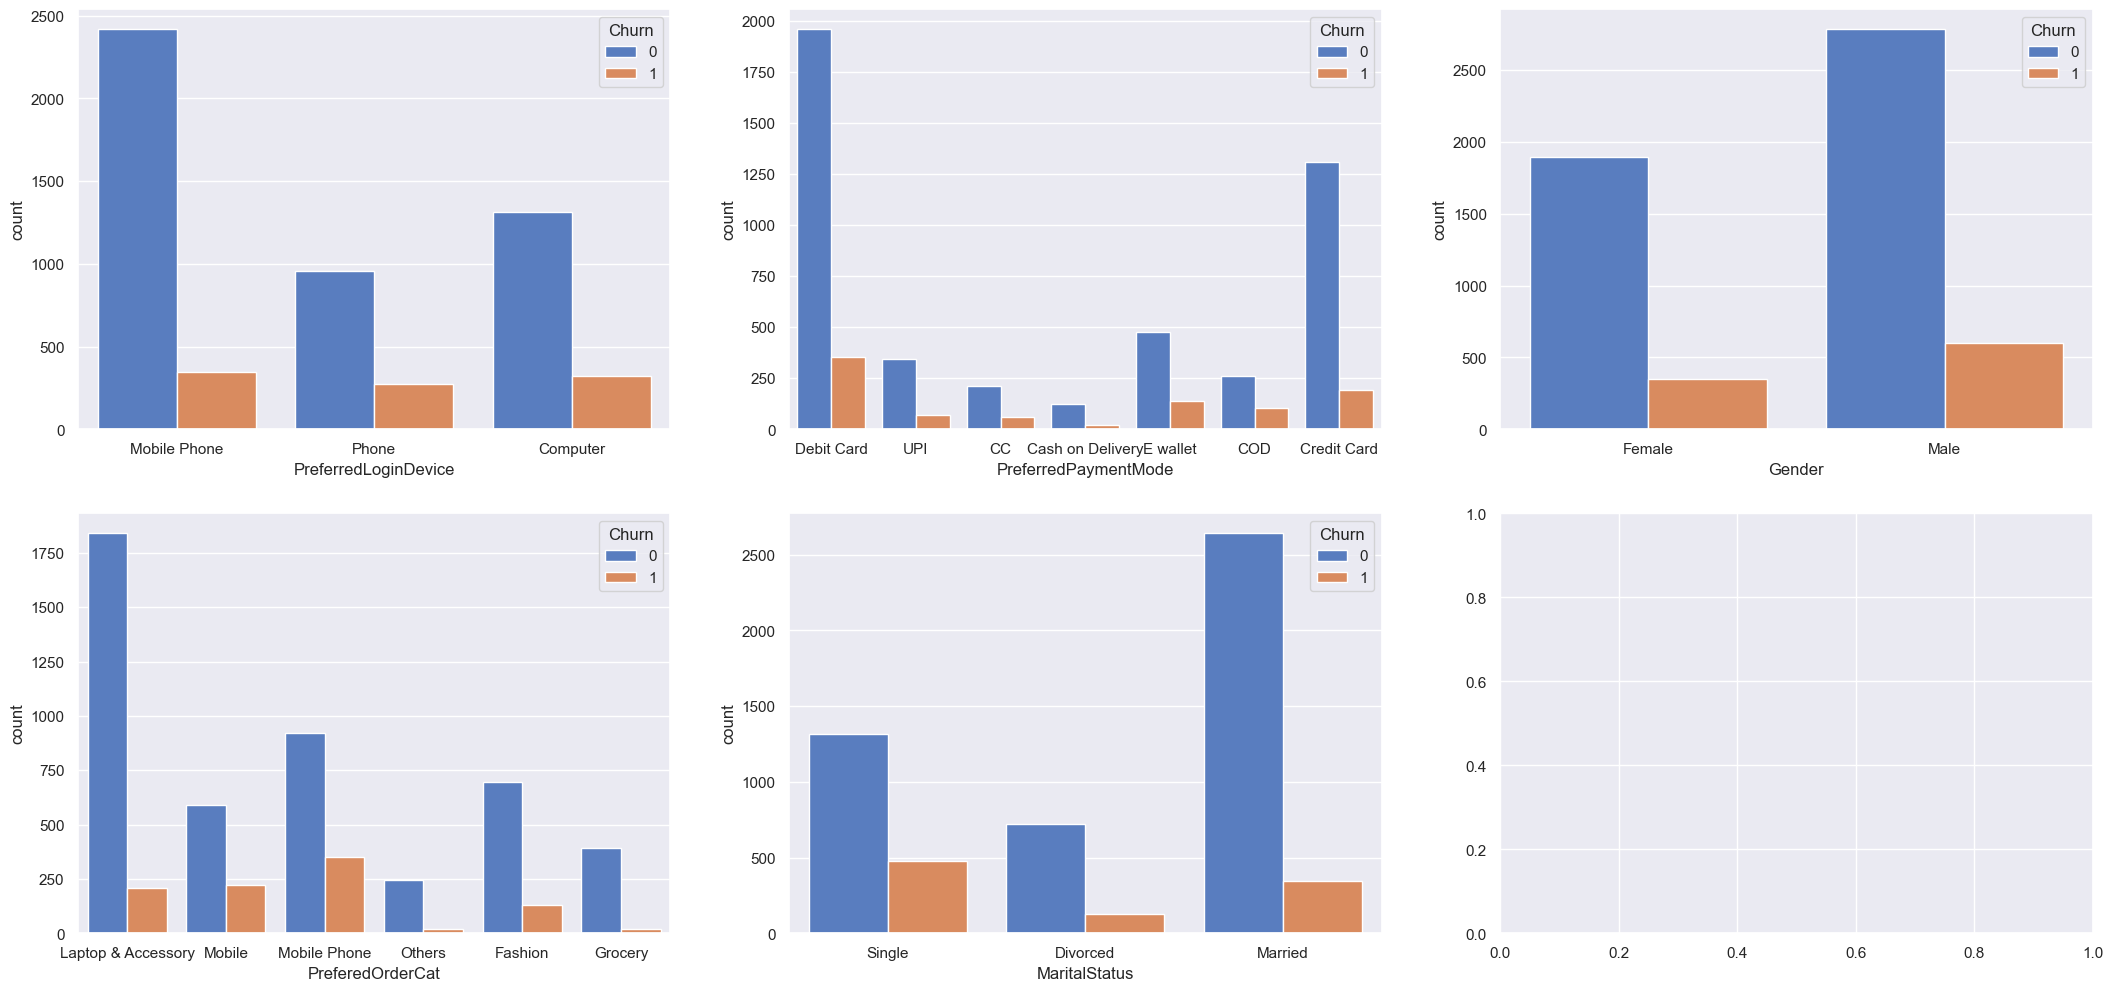

In [14]:
# Now, we will visualise each variable with their corresponding churn value

fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

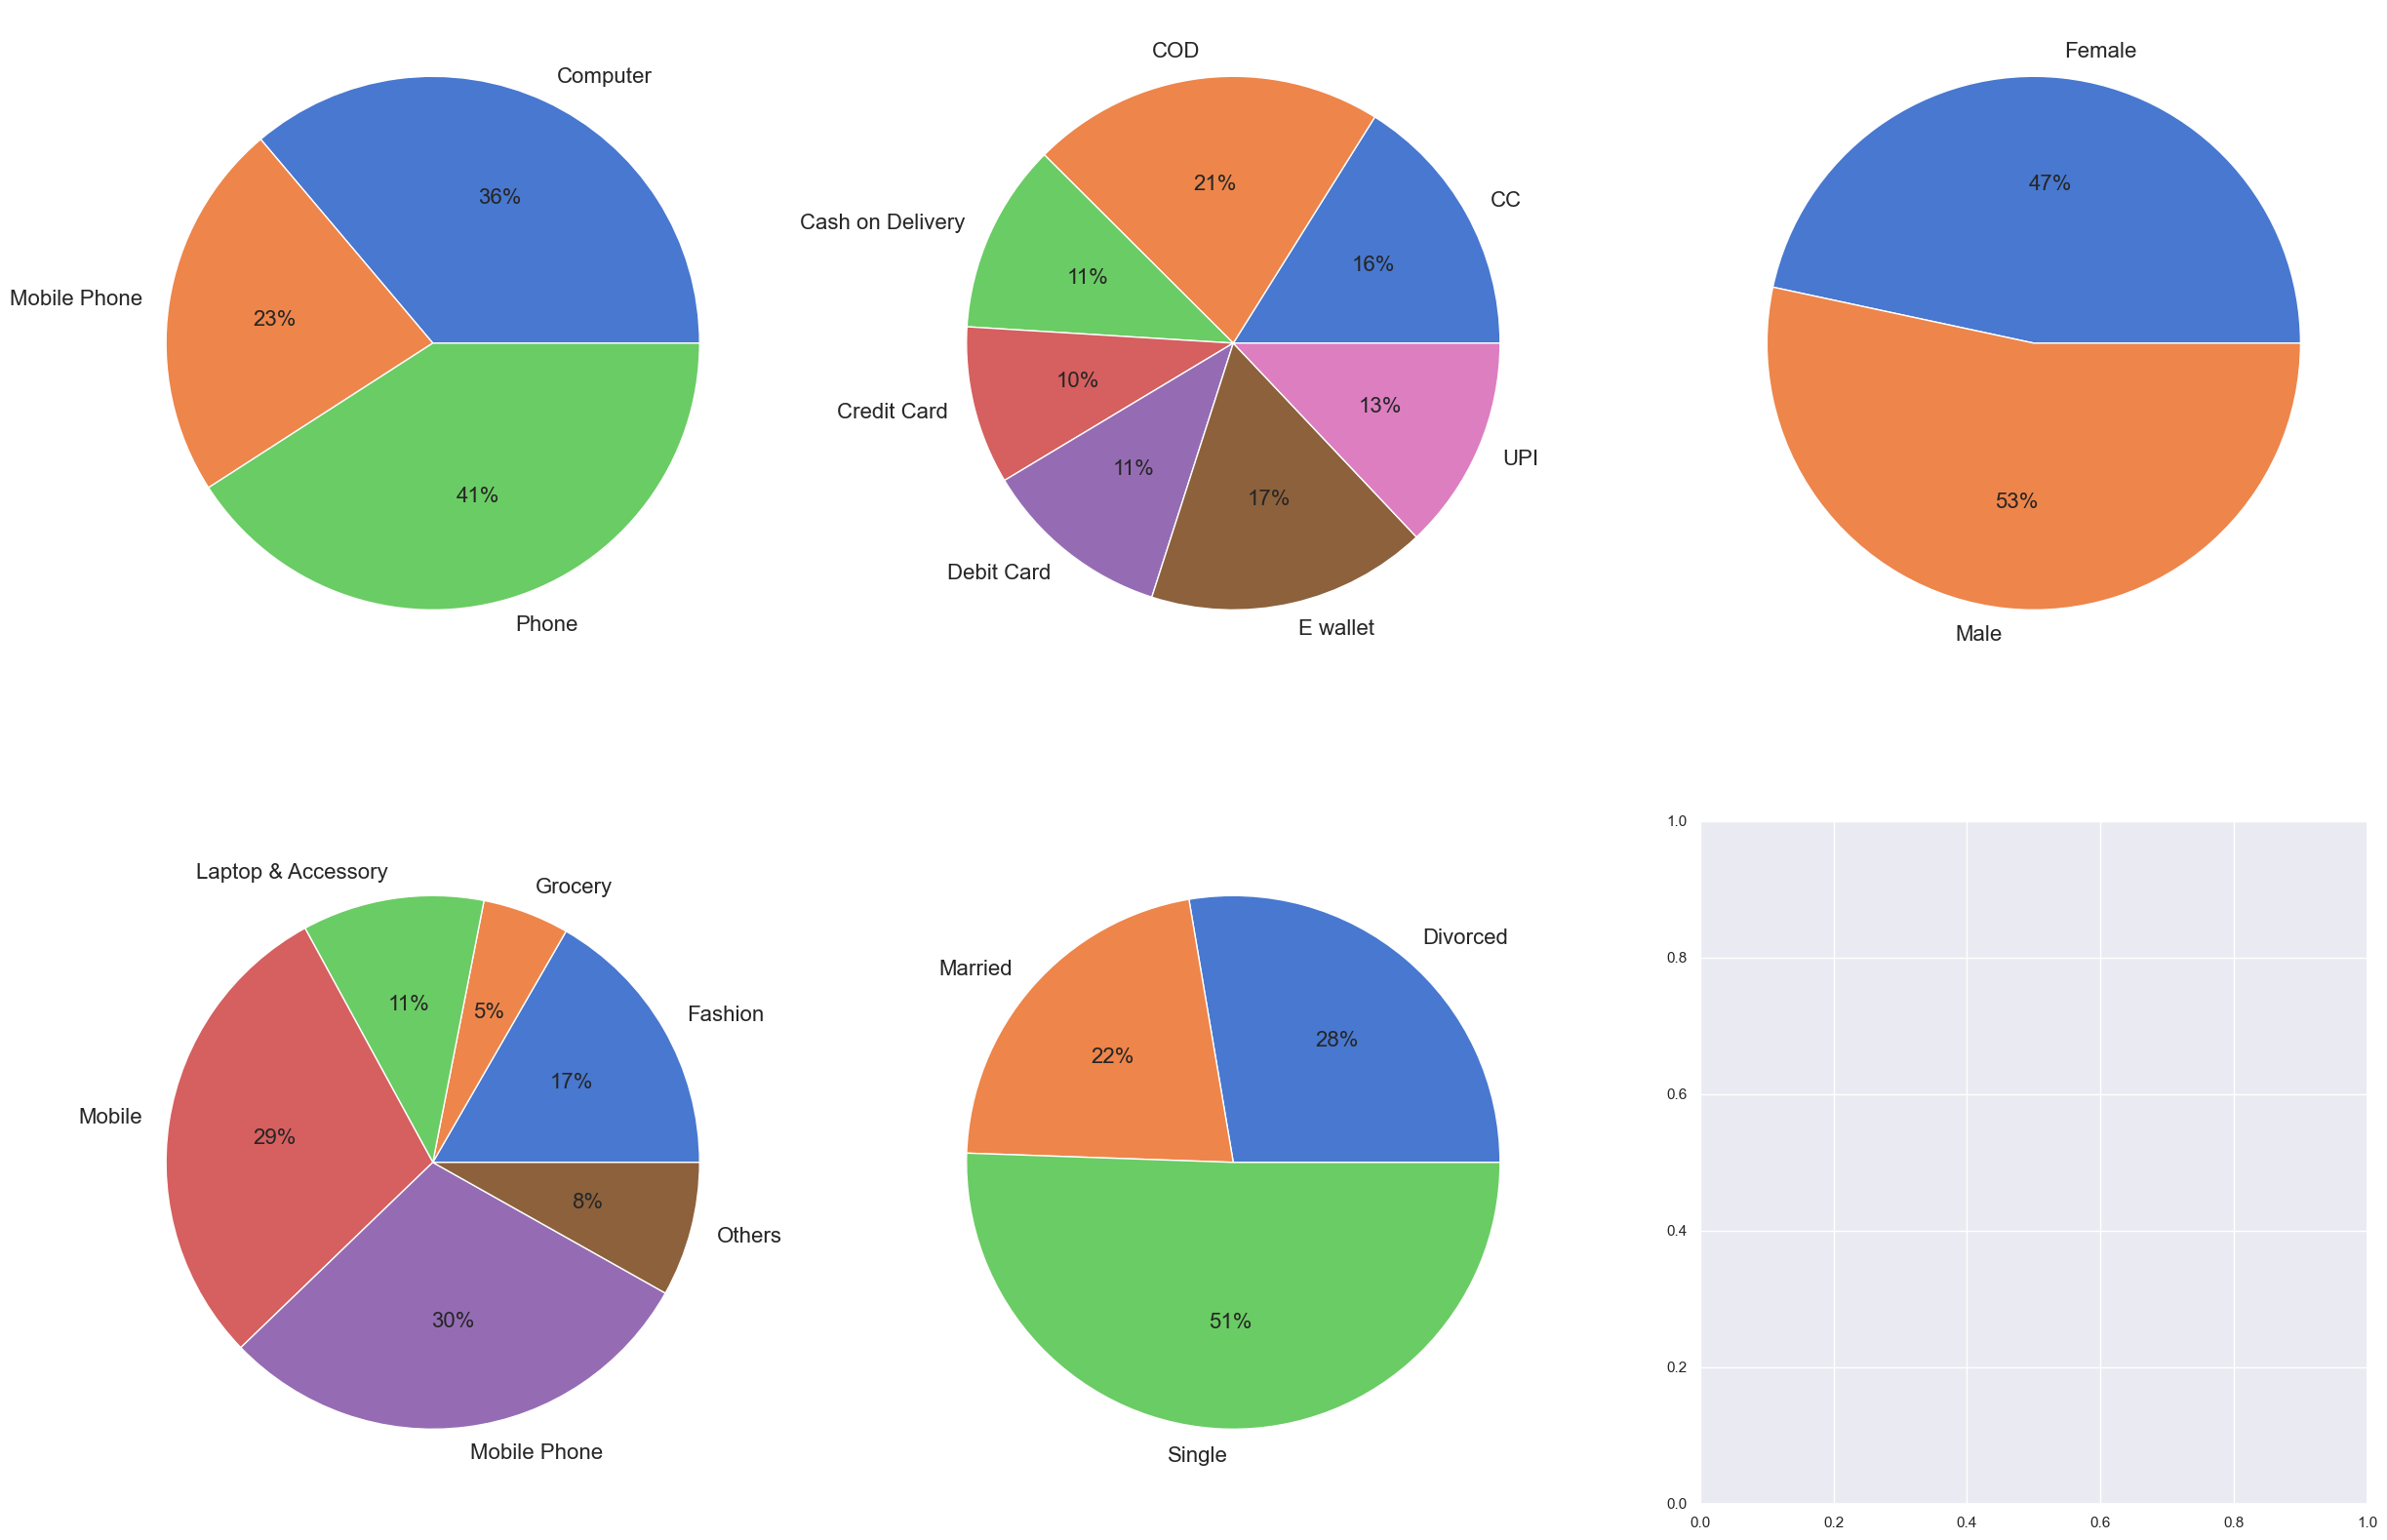

In [15]:
# To make the inferences more insightful we can find out the per cent churn contributed by each category for each variable.

fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churn 
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

# Bivariate Analysis
A correlation value close to 1 indicates a positive correlation while a correlation nearing -1 has negative relation and around zero means neutral.

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_15300\2173940117.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.zeros_like(df.corr())
C:\Users\Shraddha\AppData\Local\Temp\ipykernel_15300\2173940117.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')


<Axes: >

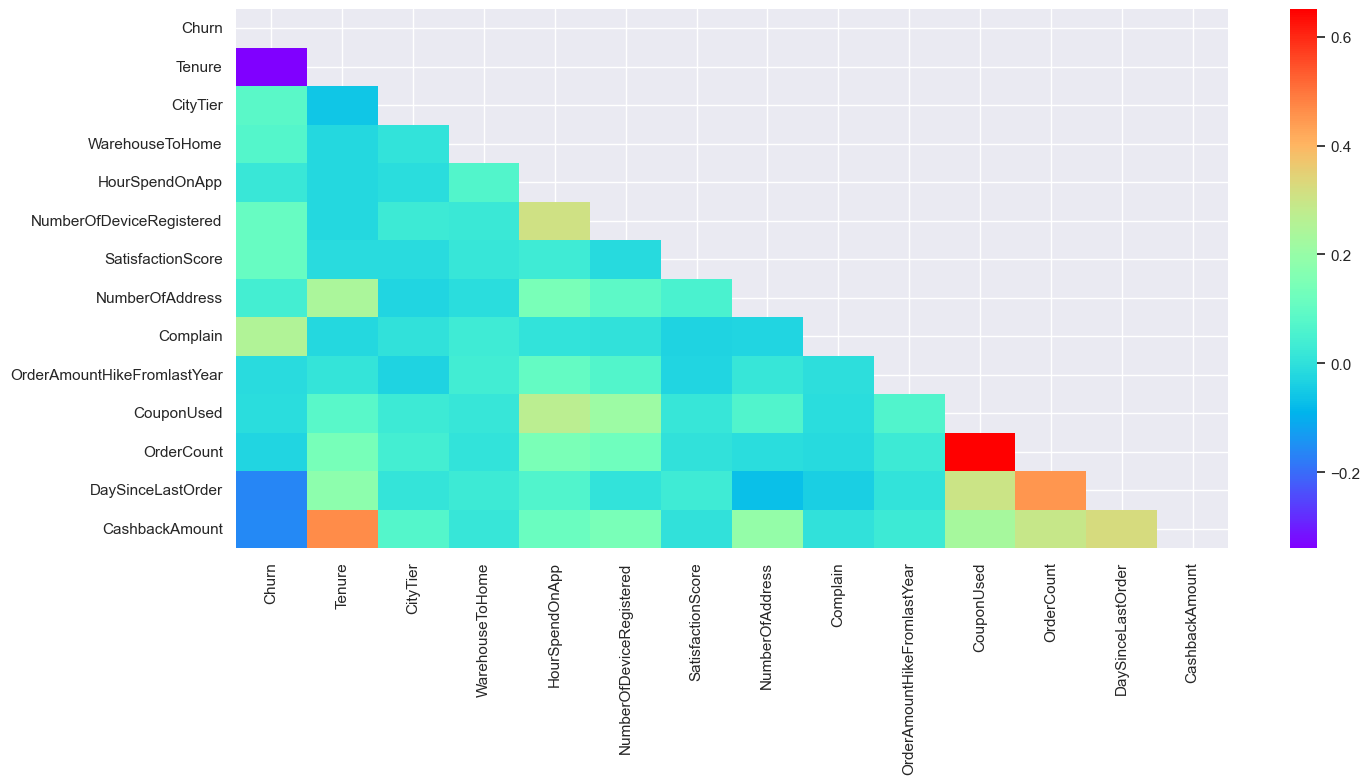

In [16]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')

We can observe there is a positive correlation between tenure and the cashback amount, also the coupon used and the order count too have a strong positive correlation. Tenure and Complain have some effect on the churn but the rest of the variables are pretty neutral.

# Model Building

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [18]:
# We have several variables with categorical values so we will encode them before feeding them to the algorithms.

enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=enc.fit_transform(df[col])

In [19]:
# Splitting the data into train and test sets

X_train, X_test,y_train, y_test = train_test_split(df.drop('Churn', axis=1), df.Churn,random_state=7)

In [20]:
# We will now construct a custom switcher class which will be able to work for any estimator passed through GridsearchCV.

class my_classifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

In [21]:
# Now, we will define our pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_classifier())])

In [22]:
# Define parameter space

parameters = [
              {'clf':[LogisticRegression(max_iter=1000)],
               'clf__C':[0.001,0.01,.1,1],
               'clf__solver':['lbfgs','liblinear']
               },
             {'clf':[RandomForestClassifier()],
             'clf__criterion':['gini','entropy'], 
             },
             {
               'clf':[DecisionTreeClassifier()],
             'clf__criterion':['gini','entropy'],
             },
             {
              'clf':[XGBClassifier()],
             'clf__learning_rate':[0.01,0.1,0.2,0.3],
             'clf__reg_lambda':[0.01,0.1,1],
             'clf__reg_alpha': [0.01,0.1,0,1],
             }]

In [23]:
# Now, we will pass the pipeline and parameter to GridsearchCV.

grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', my_classifier())]),
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.001, 0.01, 0.1, 1],
                          'clf__solver': ['lbfgs', 'liblinear']},
                         {'clf': [RandomForestClassifier()],
                          'clf__criterion': ['gini', 'entropy']},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ['gini', 'e...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...)],
                          'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
                          'clf__reg_alpha': [0.01, 0.1, 0, 1],
                          'clf__reg_lambda': [0.01, 0.1, 1]}])

In [24]:
# Let’s see which estimator best classified the data

grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [25]:
# Training Score

grid.best_score_

0.9604444880675285

In [26]:
# Predicting values for test set

y_pred = grid.predict(X_test,)

<Axes: >

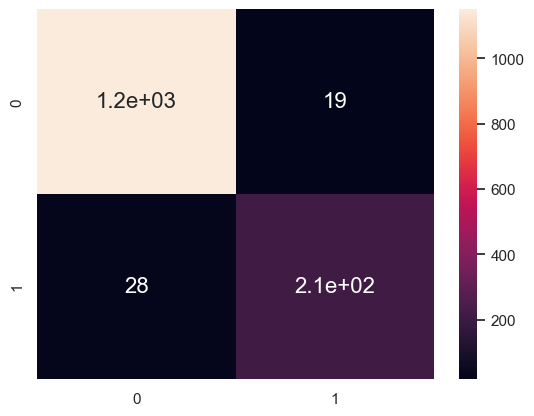

In [27]:
# Confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [28]:
# F1 score on the test set

print(f1_score(y_test,y_pred))

0.8997867803837952


# Feature Importance

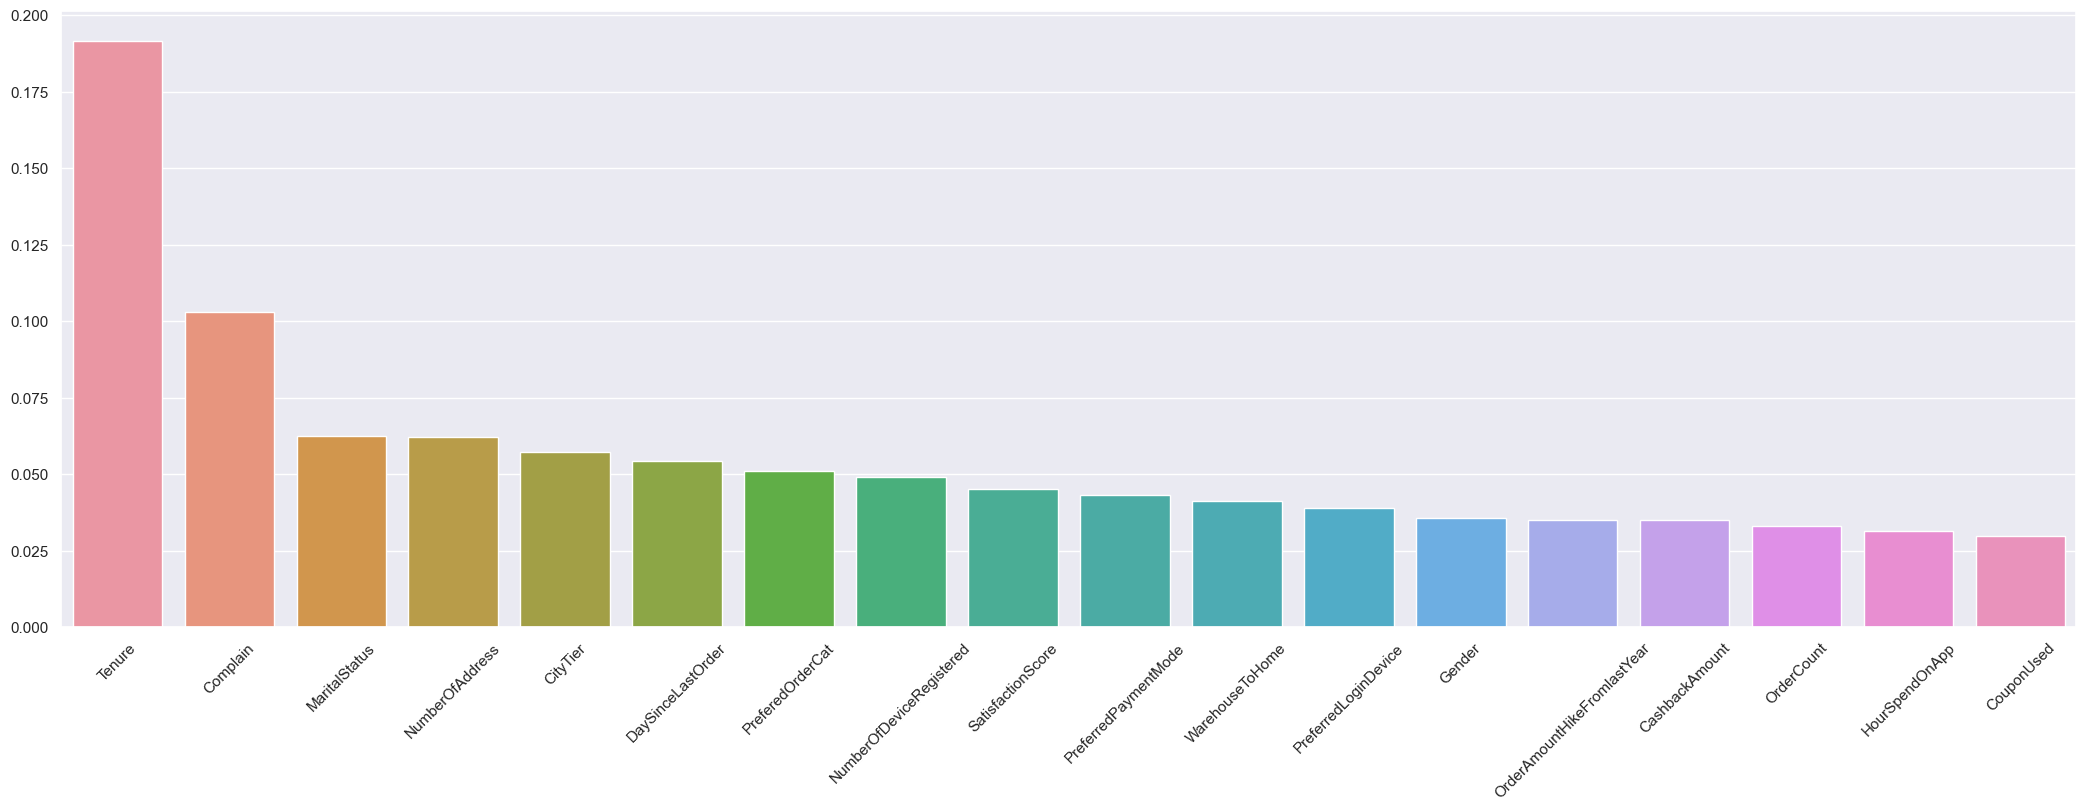

In [29]:
feature_array = grid.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('Churn',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True) )
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x=list(importance.keys()), y=list(importance.values()))
plt.tick_params(axis='x', labelrotation=45)
plt.show()

# Conclusion
E-Commerce Order Prediction is easily one of the most practical and widespread use cases of machine learning in everyday businesses. Being able to analyse why and what causes customers to leave and predict which customers are likely to leave can make decision making much easier.

We explored and performed an analysis of an e-commerce dataset.
We ran different classification algorithms with sci-kit learn’s Pipeline method.
We used GreedsearchCV for hyperparameter tuning to find the best algorithm with the best set of parameters.
Finally found out the features that had more influence on prediction.
So, this was all about E-Commerce Order Prediction.